E:\DL Projects\DL\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.2634 - loss: 2.1931 - val_accuracy: 0.3335 - val_loss: 1.9366
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3408 - loss: 1.9016 - val_accuracy: 0.3748 - val_loss: 1.8268
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.3664 - loss: 1.8409 - val_accuracy: 0.3765 - val_loss: 1.8100
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.3843 - loss: 1.8004 - val_accuracy: 0.3884 - val_loss: 1.7907
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4006 - loss: 1.7685 - val_accuracy: 0.3863 - val_loss: 1.7841
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.2832 - loss: 2.3753 - val_accuracy: 0.3415 - val_loss: 2.0014
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.3511 - loss: 1.9339 - val_accuracy: 0.3690 - val_loss: 1.8627
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3749 - loss: 1

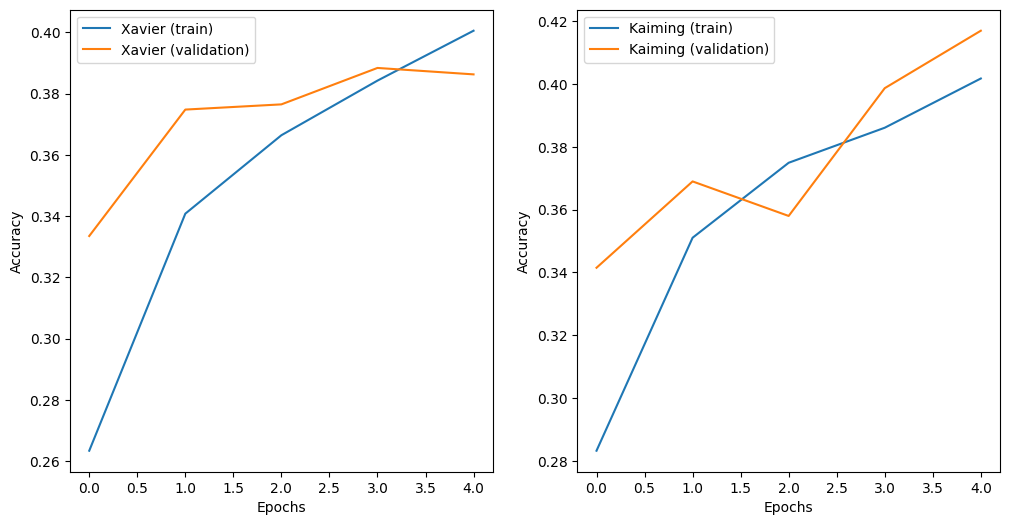

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess data
(xtr, ytr), (xte, yte) = cifar10.load_data()
xtr, xte = xtr / 255.0, xte / 255.0
ytr, yte = to_categorical(ytr), to_categorical(yte)

# Model creation function
def model_create(ini, drop=0.0, l2=None):
    model = Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, kernel_initializer=ini, kernel_regularizer=l2, activation='relu'),
        layers.Dense(256, kernel_initializer=ini, kernel_regularizer=l2, activation='relu'),
        layers.Dense(128, kernel_initializer=ini, kernel_regularizer=l2, activation='relu'),
        layers.Dense(64, kernel_initializer=ini, kernel_regularizer=l2, activation='relu'),
        layers.Dense(32, kernel_initializer=ini, kernel_regularizer=l2, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Initializers
x_ini = initializers.glorot_normal()
k_ini = initializers.he_normal()

# Models with Xavier and Kaiming initialization
x_model = model_create(x_ini, 0.3, tf.keras.regularizers.l2(0.001))
k_model = model_create(k_ini, 0.3, tf.keras.regularizers.l2(0.001))

# Compile models
x_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
k_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
x_history = x_model.fit(xtr, ytr, epochs=5, validation_data=(xte, yte))
k_history = k_model.fit(xtr, ytr, epochs=5, validation_data=(xte, yte))

# Evaluate models
_, acc = x_model.evaluate(xte, yte)
print("Test accuracy of Xavier initializer:", round(acc * 100, 4))

_, acc = k_model.evaluate(xte, yte)
print("Test accuracy of Kaiming initializer:", round(acc * 100, 4))

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_history.history['accuracy'], label='Xavier (train)')
plt.plot(x_history.history['val_accuracy'], label='Xavier (validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_history.history['accuracy'], label='Kaiming (train)')
plt.plot(k_history.history['val_accuracy'], label='Kaiming (validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
